<a href="https://colab.research.google.com/github/EldritchBear/ADA-Informes/blob/main/Select.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Descripción del problema

La estadística de orden es una herramienta fundamental de la estadística no paramétrica y de inferencia que busca encontrar el elemento más pequeño en una muestra de datos, siendo este llamado estadístico de orden.

La reducción de problemas se basa en reutilizar soluciones de un problema similar al que se quiere resolver, transformando un problema nuevo en uno que yá se encuentra resuelto, lo que nos puede demostrar que el problema que se buscaba resolver no era más complicado que el resuelto con anterioridad.

Entrada: El algoritmo recibe un conjunto con n números y un índice $i$ que es el elemento a buscar.

Salida: El elemento llamado estadístico de orden i-ésimo, el cual es mayor a $i-1$ elementos del conjunto de datos.



#2. Descripción del algoritmo

El algoritmo recibe un arreglo de n elementos junto a un indice $i$ el cual es el estadístico de orden que se quiere buscar.

1. El arreglo se divide en subarreglos de 5 elementos cada uno.

2. Cada subarreglo se ordena utilizando $Insertion Sort$.

3. Se calcula la mediana de cada subarreglo y se guardan en otro subarreglo.

4. Se ordena el subarreglo de medianas utilizando el $Insertion Sort$ para luego calcular la mediana de este.

5. Utilizando la mediana de las medianas se particiona el arreglo original, dejando elementos menores o iguales al pivote o mediana a la izquierda y los mayores a la derecha.

6. Se compara el orden estadístico entre el pivote y el elemento a busca, si el elemento es menor se busca en la partición izquierda, si es igual se retorna el pivote, y si el elemento es mayor se busca en la partición derecha.

El algoritmo al ser recursivo se va a estar llamando continuamente hasta que llegue al caso en que el pivote y el i-ésimo elemento que se buscaban tengan el mismo orden, esto se puede ver en el paso 6, que es donde se revisa si se retorna el pivote o se sigue buscando recursivamente. Se puede observar que el algoritmo solo necesita el arreglo original al buscar el mejor pivote, o en otras palabras, la mediana de las medianas, puesto que luego al momento de buscar el i-ésimo valor solo se usan particiones del arreglo original, lo que podría significar un tiempo de ejecución de $O(nlogn)$.


##2.1 Código del Select

In [2]:
cont = 0
def insertionSort(arreglo):
  global cont
  n = len(arreglo)
  
  for i in range(0,n):
    dato = arreglo[i]
    while (i > 0 and arreglo[i-1] > dato):
      cont += 1
      arreglo[i] = arreglo[i-1]
      i = i - 1
      arreglo[i] = dato
  return arreglo

In [3]:
def partition(arreglo,low,high):
  global cont
  if verbose:
    print("entrando a función partition")

  piv = arreglo[high]                                                  #usamos como pivote el dato de más a la derecha
  i = low - 1

  for j in range(low, high):                                           #se recorre el arreglo para ordenar los elementos por el pivote
    if arreglo[j] <= piv:                                              #si se encuentra un elemento menor al pivote se intercambia para moverlo a la iquierda
      cont += 1
      i += 1
      arreglo[i], arreglo[j] = arreglo[j], arreglo[i]

  arreglo[i+1], arreglo[high] = arreglo[high], arreglo[i+1]           #se coloca el pivote en su posición correspondiente

  if verbose:
    print("saliendo de función partition con pivote igual a: ", i+1)

  return i+1

In [4]:
import math

def pivotSelect(arreglo, low, high):
  global cont
  cant = math.ceil((high-low+1)/5)                                              #calculamos la cantidad de subarreglos que existen
  medianas = []                                                                 #arreglo donde se van a almacenar las medianas para luego calcular la mediana de medianas

  for k in range(cant):                                                         #se divide el arreglo en subarreglos de tamaño 5 y se ordenan con insertion sort
    auxLow = low + 5*k                                                          #se calcula la mediana del subarreglo y se coloca en el arreglo de medianas
    auxHigh = low + 4 + 5*k
    if (auxHigh > high):
      auxHigh = high

    arreglo[auxLow:auxHigh+1] = insertionSort(arreglo[auxLow:auxHigh+1])
    medianas.append((auxHigh + auxLow)//2)
  
  medianas = insertionSort(medianas)                                            #se ordena el arreglo de medianas y con el select se calcula la mediana de medianas
  n = len(medianas)
  pivote = select(medianas, 0, n-1, n//2, verbose)
  cont += 1

  for k in range(cant):                                                         #el select al retornar un dato debemos buscar la posición de este dato
    if pivote == arreglo[k]:
      pivote = k

  if verbose:
    print("mediana de medianas: ",pivote)

  arreglo[auxHigh-1], arreglo[pivote] = arreglo[pivote], arreglo[auxHigh-1]     #se coloca el pivote donde debería estar
  
  return partition(arreglo,low,high)


In [5]:
def select(arreglo, low, high, i, verbose):
  global cont
  if (low == high or len(arreglo) == 1):                                        #caso base
    cont += 1
    return arreglo[low]

  if verbose:
    print("\n")
    print("arreglo entrando al select: ",arreglo)

  q = pivotSelect(arreglo, low, high)                                           #se obtiene el posible dato i-ésimo y se comprueba si es el dato que se buscaba, si es más
  k = q - low + 1                                                               #a la derecha del pivote o a la izquierda del pivote

  if verbose:
    print("estadístico de orden: ",k)

  if i == k:
    cont += 1
    return arreglo[q]
  elif i < k:
    cont += 1
    return select(arreglo, low, q-1, i, verbose)
  else:
    cont += 1
    return select(arreglo, q+1, high, i-k, verbose)  

### 2.2 Select sin verbose

In [ ]:
arreglo = [3, 7, 8, 1, 4, 6, 9, 5]
i = int(input("ingrese elemento "))
n = len(arreglo)
print(arreglo)
verbose = False
a = select(arreglo,0,n-1,i, verbose)
print(a)
cont = 0

ingrese elemento 6
[3, 7, 8, 1, 4, 6, 9, 5]
7


###2.3 Select con verbose

In [ ]:
arreglo = [3, 7, 8, 1, 4, 6, 9, 5]
i = int(input("ingrese elemento "))
n = len(arreglo)
print("arreglo original: ",arreglo)
verbose = True
a = select(arreglo,0,n-1,i, verbose)
print("\n")
print("dato i-ésimo: ",a)
print("cantidad de comparaciones por funcion pivot selection: ", cont)
cont = 0

ingrese elemento 6
arreglo original:  [3, 7, 8, 1, 4, 6, 9, 5]


arreglo entrando al select:  [3, 7, 8, 1, 4, 6, 9, 5]


arreglo entrando al select:  [2, 6]
mediana de medianas:  0
entrando a función partition
saliendo de función partition con pivote igual a:  1
estadístico de orden:  2
mediana de medianas:  2
entrando a función partition
saliendo de función partition con pivote igual a:  7
estadístico de orden:  8


arreglo entrando al select:  [1, 3, 6, 7, 8, 5, 4, 9]


arreglo entrando al select:  [2, 5]
mediana de medianas:  0
entrando a función partition
saliendo de función partition con pivote igual a:  1
estadístico de orden:  2
mediana de medianas:  2
entrando a función partition
saliendo de función partition con pivote igual a:  3
estadístico de orden:  4


arreglo entrando al select:  [1, 3, 4, 5, 8, 6, 7, 9]
mediana de medianas:  5
entrando a función partition
saliendo de función partition con pivote igual a:  6
estadístico de orden:  3


arreglo entrando al select:  [1, 3, 

#3. Tiempo de Ejecucción

Para calcular el tiempo de ejecución se deben tener en cuenta el tiempo de ejecucción de cada función, el pivot Select nos da $T(n) = n/5$ debido a que divide en subarreglos. El $insertion sort$ en caso promedio tiene complejidad de $O(n^2)$, pero como es un tamaño constante en este caso podria tomarse como $O(1)$. La función partition debiese ser un $O(n)$ puesto que recorre hasta n-1 comparando los datos. Y por último la función $Pivot Select$ como divide y calcula la mediana de los datos que es mayor a $7n/10+6$, por lo que es una complejidad de O(n).

Como podemos ver, gracias al metodo de mediana de medianas (pivot select) la complejidad del algoritmo es $O(n)$, este metodo surgio de la idea de reducir el tiempo de ejecucción que tenia el algoritmo que solamente utilizaba el partition, el cual tenia una complejidad de $O(nlogn)$.


#4. Correctitud

Caso base: cuando el subarreglo n tiene tamaño igual a 1, lo que terminaria como low = high o $arreglo[low]$ = $arreglo[high]$. 

Cuando el tamaño del subarreglo n es mayor a 1, i será un número dentro del rango. Si el pivote no es el elemento buscado, el arreglo se particionará en elementos menores y elementos mayores a este, minimizando el rango de busqueda de forma recursiva hasta encontrar el elemento buscado o llegar al caso base.

Tomando la complejidad de las funciones que mostramos en el analisis de tiempo, podemos verificar la correctitud por inducción de la siguiente forma:

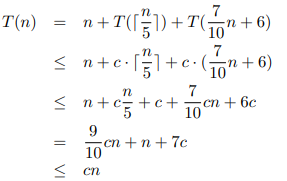

#5. Experimento

Ahora realizaremos un numero de experimentos que nos ayudaran a visualizar la eficacia del **select** en ciertos aspectos.

##5.1. Numero de comparaciones

En este experimento se comprobara el numero de comparaciones que el algoritmo **select** necesita realizar para poder encontrar el I=esimo elemento de una lista.

Para ello se hizo una grafica en la que se muestra.

* La cantidad de comparaciones del peor caso calculadas matemáticamente,
* La cantidad de comparaciones del mejor caso calculadas matemáticamente (n-1 comparaciones si el arreglo está ordenado)
* La cantidad de comparaciones realizadas experimentalmente para entradas aleatorias

para un problema que tiene un tamaño $n \in [5,100]$

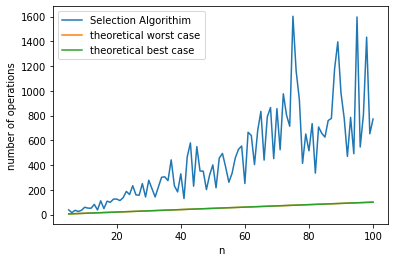

In [117]:
import matplotlib.pyplot as plt
import random

x=[n for n in range(5,101)] 
y1=[n for n in range(5,101)] # worst case
y2=[n for n in range(5,101)] # best case
y=[]; 

for n in range(5,101):
  verbose = False
  a = random.sample(range(1, 200), n)
  n = len(a)
  i = random.randint(1,n)
  a = select(a,0,n-1,i,verbose)
  y.append(cont)
  cont = 0

plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["Selection Algorithim", "theoretical worst case", "theoretical best case"])

plt.xlabel('n')
plt.ylabel('number of operations')
plt.show()

##5.2. Comparación entre algoritmos

En este experimento se compararán dos algoritmos de busqueda el **Select** y el **Randomized select**, en específico se comparará el número de comparaciones que realizan ambos algoritmos.

Como el nombre sugiere el **Randomized select** funciona de la misma manera que el select, pero en este caso el pivote no estara dado por la mediana, si no que sera un pivote aleatorio en el arreglo.

Para ello se hizo una gráfica en la que se muestra.

* La cantidad de comparaciones que el **Select** realiza (la gráfica azul)
* La cantidad de comparaciones que el **Randomized select** realiza (la gráfica naranja)

para un problema que tiene un tamaño $n \in [5,100]$

In [87]:
cont = 0
def R_Partition(A,min,max):
  i = random.randint(min,max)
  (A[max], A[i]) = (A[i],A[max])
  return partition(A,min,max)

def R_Select(A,min,max,i):
  global cont
  if min == max:
    return A[min]
  
  piv = R_Partition(A,min,max)
  k = piv - min + 1

  if i == k:
    cont += 1
    return A[piv]
  elif i < k:
    cont += 1
    return R_Select(A,min,piv-1,i)
  else:
    cont += 1
    return R_Select(a,piv+1,max,i)

In [123]:
import matplotlib.pyplot as plt
import random

x=[n for n in range(5,51)] 
y1=[]; y2=[]

for n in range(5,51):
  verbose = False
  a = random.sample(range(1, 201), n)
  n = len(a)
  i_esimo = random.randint(1,n)

  select(a,0,n-1,i_esimo,verbose)
  y1.append(cont)
  cont = 0

  R_Select(a,0,n-1,i_esimo)
  y2.append(cont)
  cont = 0

plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["Select algorithim","Randomized select algorithim"])

plt.xlabel('n')
plt.ylabel('number of operations')
plt.show()

ValueError: ignored

In [124]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import random

x=[]; y=[]
x1=[]; y1=[]

for n in range(5,500):

  a = random.sample(range(1, 100), n)
  k = len(a)
  i = random.randint(1,n-1)

  #la función repeat está ejecutando 20 veces cada algoritmo con el arreglo a y retorna el mejor tiepo obtenido para cada uno.
  t = repeat(setup="from __main__ import select", stmt=f"select({a},{0},{k-1},{i},{False})", repeat=1, number=10)

  x.append(n)
  y.append(t)

  t = repeat(setup="from __main__ import R_Select", stmt=f"R_Select({a},{0},{k-1},{i})", repeat=1, number=10)

  x1.append(n)
  y1.append(t)

plt.plot(x,y)
plt.plot(x1,y1)
plt.legend(["Select", "R-Select"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

ValueError: ignored